In [43]:
#Import basic data types
import pandas as pd
import numpy as np

In [44]:
%matplotlib inline

In [45]:
import seaborn as sns

# 1) Load the dataset 

In [46]:
#Load Parkinsons data set
parkdf = pd.read_csv("/home/amol/GL/LabML/Residency3/Project2/parkinsons.data")

In [47]:
parkdf.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2) It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset

In [48]:
# Lets create another data set and lets do some analyses on that data set
parkdf1 = parkdf

In [49]:
# Will be using parkdf1 data set for data analyese
# The patient name is of the format "phon_R01_S01_1", "phon_R01_S05_1" and so on
# So I am creating one new column just to store person number which will be extracted from "name" column
# E.g. patient number for "phon_R01_S01_1" will be 1
#      patient number for "phon_R01_S05_1" will be 5...i.e. 2 digits after "phon_R01_S" i.e. from 10 to 11th index in string

In [50]:
def extractPatientNo(patientName) :
    return int(patientName[10:12])

In [51]:
parkdf1["patientNo"] = parkdf["name"].apply(extractPatientNo)

In [52]:
parkdf1.shape

(195, 25)

In [53]:
parkdf1["patientNo"].unique()

array([ 1,  2,  4,  5,  6,  7,  8, 10, 13, 16, 17, 18, 19, 20, 21, 22, 24,
       25, 26, 27, 31, 32, 33, 34, 35, 37, 39, 42, 43, 44, 49, 50])

In [54]:
parkdf1["patientNo"].unique().shape

(32,)

In [55]:
parkdf1["patientNo"].value_counts()

27    7
35    7
21    7
50    6
13    6
19    6
18    6
17    6
16    6
8     6
10    6
7     6
6     6
5     6
4     6
2     6
20    6
22    6
49    6
24    6
25    6
26    6
31    6
32    6
33    6
34    6
37    6
39    6
42    6
43    6
44    6
1     6
Name: patientNo, dtype: int64

In [56]:
32*6 + 3        # 6 records per person and for 3 persons have 7 records each.

195

In [57]:
# Observation(1) : The data set contains records of 32 people.
#                  However in "parkinsons.names" it is mentioned that records belong to 31 person
# Observation(2) : Some patient numbers 3, 9, 12 etc. are missing...anyway it has nothing to do but just observation
# Observation(3) : Patient "phon_R01_S21_1", "phon_R01_S27_1" and "phon_R01_S35_1" have 7 records instead of 6. 
#                  However in "parkinsons.names" it is mentioned that each person has 6 records.
#                  Do not think this addtional record will have any challenge as such...lets see
# Observation(4) : There are total 25 columns...if we leave "name" and "status", there are 23 attributes which
#                  needs to be analysed to see its effect on "status" (0-Healthy, 1-Parkinson's disease)
# Observation(5) : It is not given, in "parkinsons.names", that the 6 recordings per person 
#                  were taken over period of time...say after every 15 days or 30 days or 45 days
#                  OR
#                  were taken during single session of few mins with that person..say in 30-40 mins...I think this is 
#                  likely hood scenario as voice (and frequency in specific) of any person may 
#                  vary (within a ragne for that person) with respect time(seconds or minutes) and it is logical to
#                  take multiple records of voice (frequency) in one session and then consider its average values
# Assumption (1) : Based on Observation(5), I am assuming that 6 recordings per person were taken in signle session
#                  and for model building we can take average of 6 records per person

In [58]:
#filter = parkdf1["patientNo"]==1
#parkdf1.where(filter,inplace=False).head(6).groupby("patientNo").mean()

Lets compute mean for each person and create data set as below

In [59]:
parkfinaldf = parkdf1.groupby(["patientNo"]).mean()

In [60]:
parkfinaldf

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
patientNo,,,,,,,,,,,,,,,,,,,,,
1,118.719333,141.312833,106.029833,0.010085,0.000087,0.004998,0.007312,0.014992,0.053932,0.515167,...,0.084073,0.016318,20.406667,1,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
2,99.770333,121.894333,95.413167,0.004585,0.000050,0.002325,0.002857,0.006978,0.021668,0.194333,...,0.033125,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
4,147.346167,216.867500,87.532333,0.004347,0.000030,0.001760,0.002320,0.005285,0.019343,0.181667,...,0.028148,0.013080,23.899667,1,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
5,159.837667,181.630167,86.767167,0.006247,0.000040,0.003062,0.003422,0.009188,0.043337,0.388167,...,0.061477,0.025608,19.058667,1,0.626723,0.695886,-4.560947,0.278482,2.787869,0.310658
6,150.644667,208.264333,78.278333,0.005230,0.000037,0.002725,0.002838,0.008173,0.021367,0.209667,...,0.029023,0.014892,24.762000,1,0.432723,0.719675,-6.223537,0.228296,2.440360,0.164939
7,200.266833,210.884333,194.366167,0.002163,0.000010,0.001175,0.001282,0.003523,0.010803,0.095667,...,0.016148,0.001495,30.992167,0,0.395578,0.741482,-7.589537,0.173049,1.795701,0.068113
8,182.032500,196.059833,170.768167,0.003227,0.000018,0.001763,0.001882,0.005297,0.016737,0.151000,...,0.025815,0.003183,25.748333,1,0.355864,0.768637,-6.384376,0.193017,2.400193,0.147991
10,243.814333,254.280500,222.115000,0.002390,0.000009,0.001285,0.001487,0.003850,0.015308,0.137000,...,0.025922,0.005422,24.614667,0,0.451700,0.638251,-7.105562,0.129853,2.298465,0.098390
13,125.546333,134.313167,116.898833,0.004595,0.000035,0.001445,0.001738,0.004335,0.020510,0.186167,...,0.034442,0.005365,24.736500,0,0.509845,0.762657,-6.695058,0.261352,2.100401,0.123182


# 3) Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


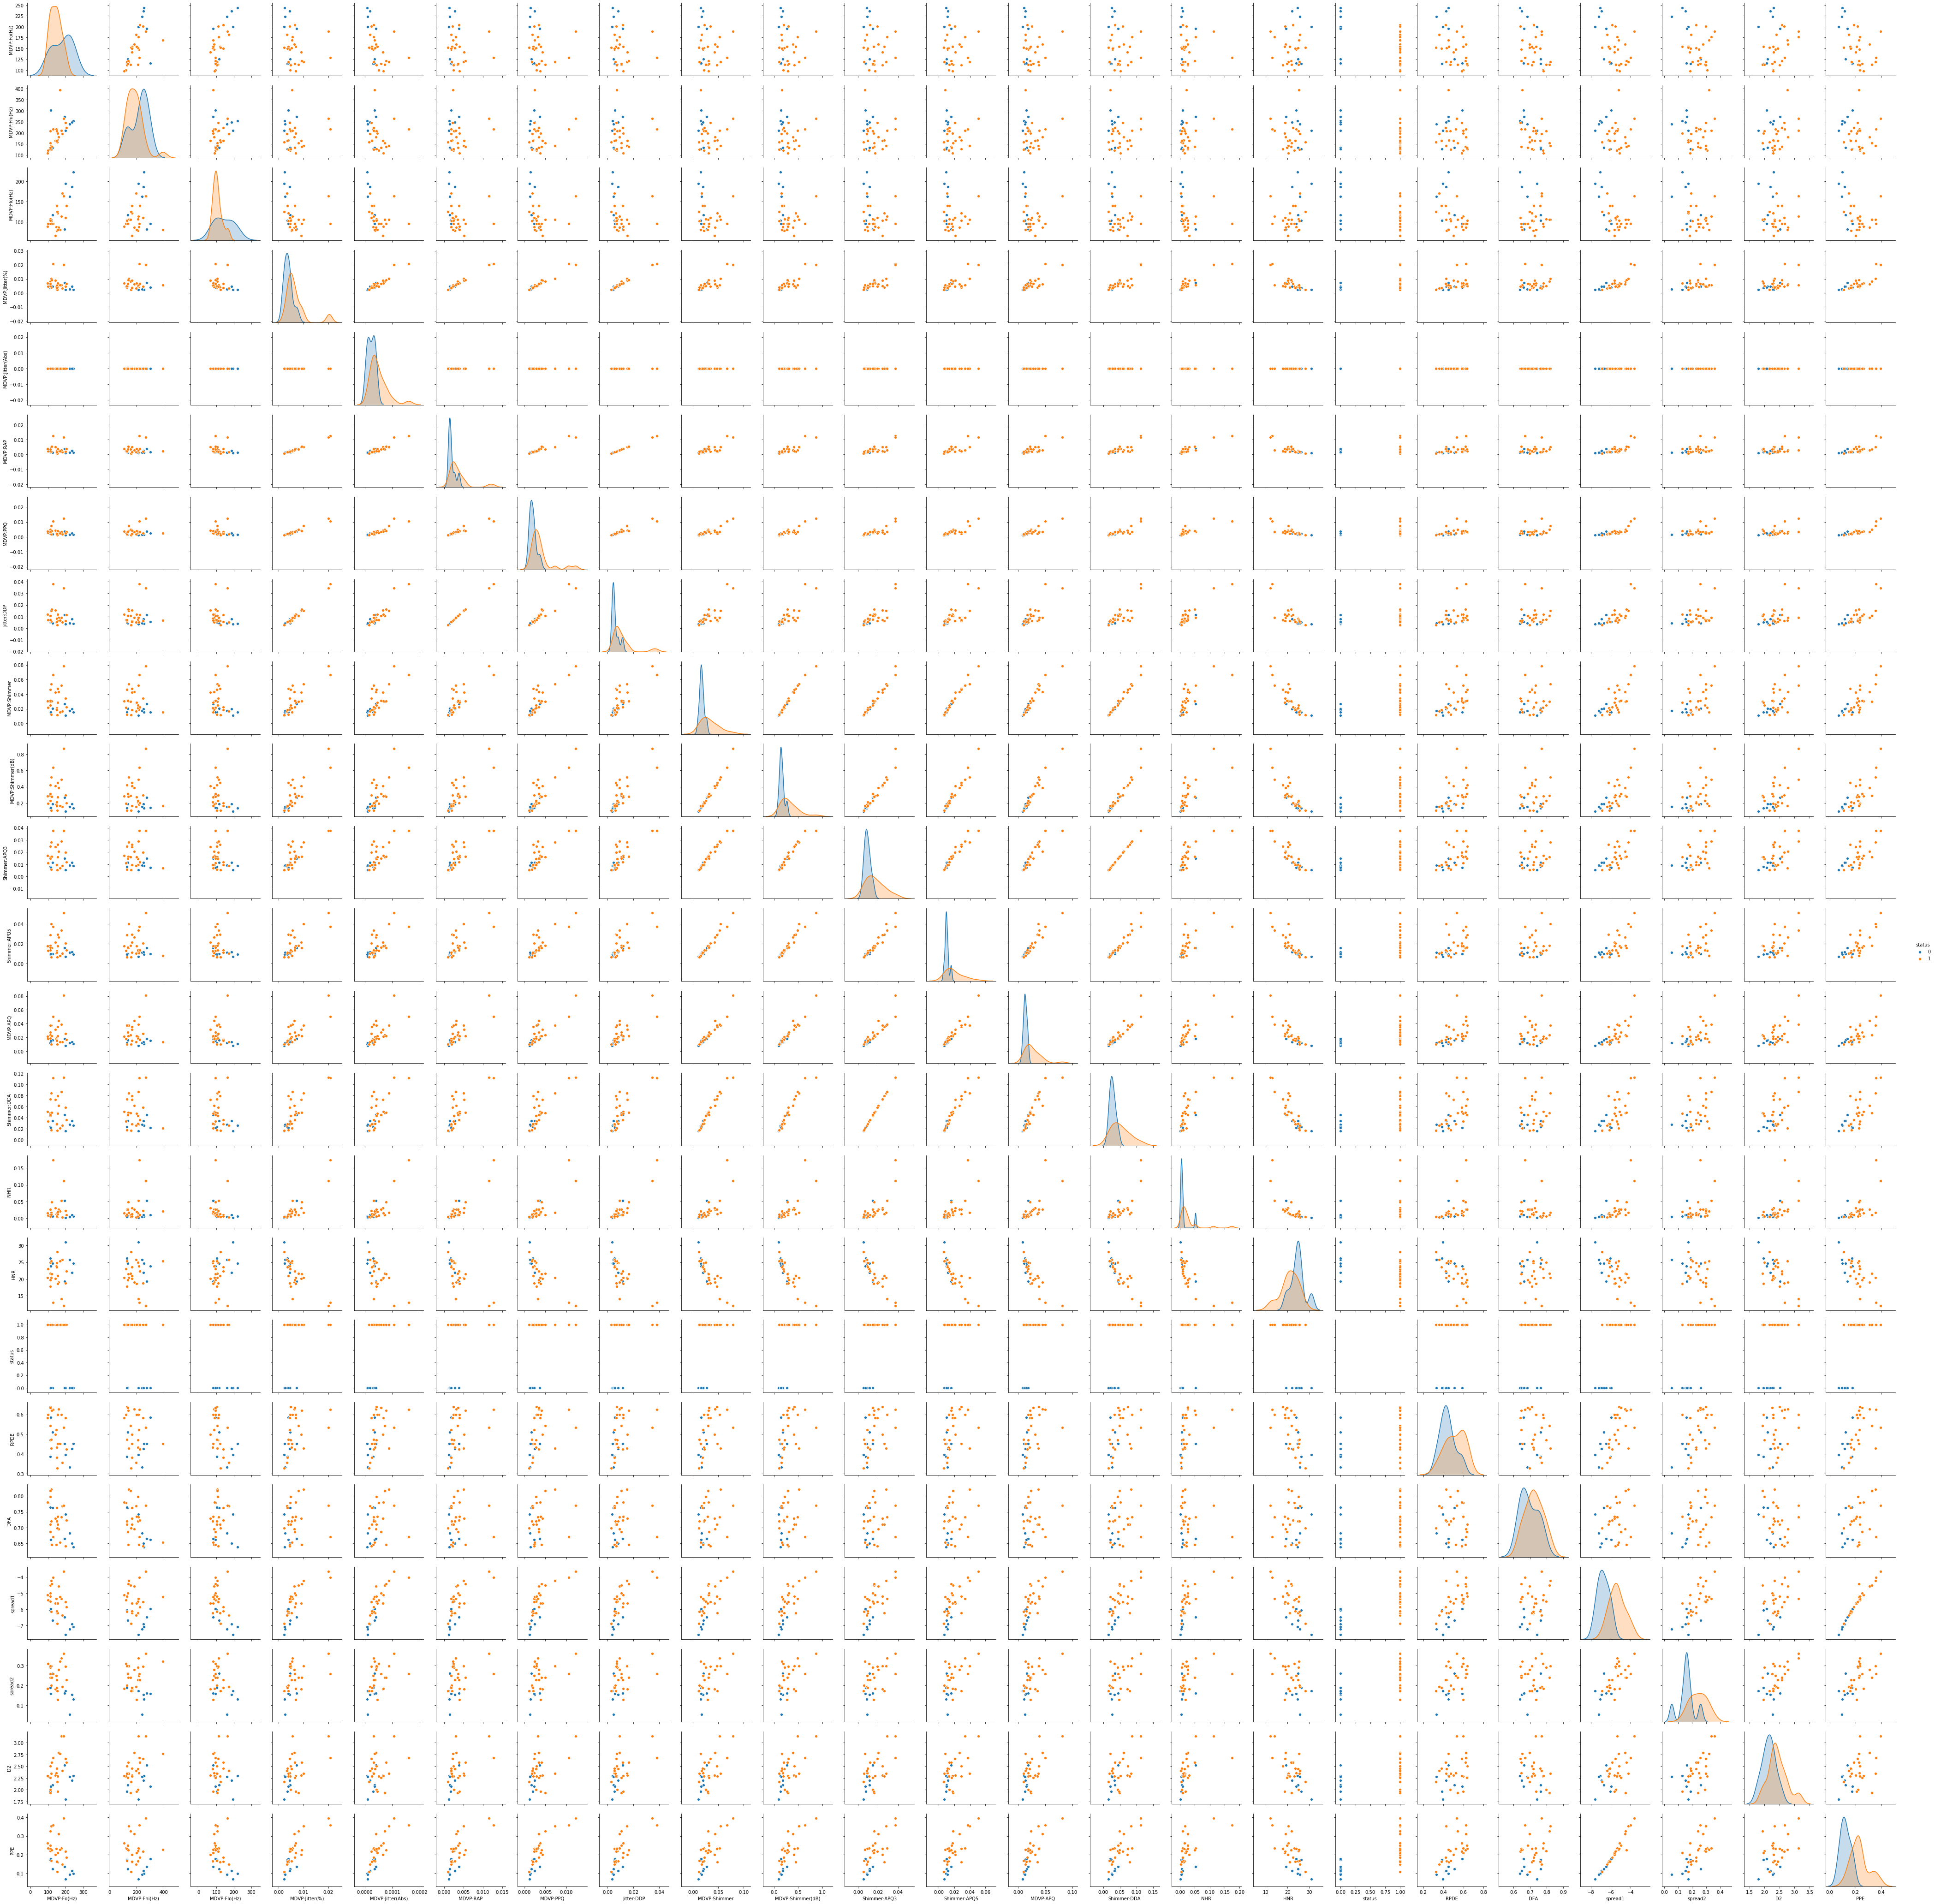

In [62]:
sns.pairplot(parkfinaldf, hue='status')

In [63]:
parkfinaldf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),32.0,153.858151,40.949041,97.938333,118.115375,150.104833,183.744911,243.814333
MDVP:Fhi(Hz),32.0,195.649043,62.764960,107.757500,140.413667,197.206167,226.453375,393.855857
MDVP:Flo(Hz),32.0,116.273048,37.627868,66.233833,93.420375,104.581167,128.350500,222.115000
MDVP:Jitter(%),32.0,0.006156,0.004265,0.002147,0.003864,0.004832,0.006831,0.020787
MDVP:Jitter(Abs),32.0,0.000044,0.000031,0.000009,0.000025,0.000035,0.000052,0.000160
MDVP:RAP,32.0,0.003271,0.002606,0.000925,0.001782,0.002426,0.003833,0.012718
MDVP:PPQ,32.0,0.003407,0.002444,0.001133,0.002066,0.002828,0.003731,0.012237
Jitter:DDP,32.0,0.009812,0.007816,0.002780,0.005348,0.007278,0.011500,0.038157
MDVP:Shimmer,32.0,0.029412,0.016654,0.010803,0.017004,0.023552,0.036560,0.078433
MDVP:Shimmer(dB),32.0,0.278740,0.171568,0.095667,0.160940,0.217083,0.330292,0.871143


In [159]:
parkfinaldf.skew(axis=0)

MDVP:Fo(Hz)         0.613640
MDVP:Fhi(Hz)        1.018376
MDVP:Flo(Hz)        1.266641
MDVP:Jitter(%)      2.490618
MDVP:Jitter(Abs)    1.994969
MDVP:RAP            2.647006
MDVP:PPQ            2.489812
Jitter:DDP          2.647573
MDVP:Shimmer        1.304792
MDVP:Shimmer(dB)    1.718167
Shimmer:APQ3        1.085748
Shimmer:APQ5        1.482141
MDVP:APQ            2.095660
Shimmer:DDA         1.085749
NHR                 3.235741
HNR                -0.499921
RPDE               -0.078987
DFA                 0.165049
spread1             0.127866
spread2            -0.118145
D2                  0.638756
PPE                 0.574859
dtype: float64

In [161]:
parkfinaldf.kurtosis(axis=0)

MDVP:Fo(Hz)         -0.594621
MDVP:Fhi(Hz)         1.674337
MDVP:Flo(Hz)         1.020377
MDVP:Jitter(%)       6.778198
MDVP:Jitter(Abs)     5.343299
MDVP:RAP             7.543957
MDVP:PPQ             6.591199
Jitter:DDP           7.547232
MDVP:Shimmer         1.359613
MDVP:Shimmer(dB)     3.533930
Shimmer:APQ3         0.513848
Shimmer:APQ5         1.871040
MDVP:APQ             5.810031
Shimmer:DDA          0.513882
NHR                 11.620960
HNR                  0.548832
RPDE                -1.207788
DFA                 -0.984711
spread1             -0.447204
spread2             -0.296177
D2                   0.612597
PPE                  0.021452
dtype: float64

# Few observations


1) MDVP:Fo(Hz) - The distribution of data of people having PD is peaked at mean and has less variation.
                The distribution of data of healthy people is bulgy and has large variation
                Above data points suggests that, on an average, people having PD will have lower value of MDVP:Fo(Hz)
                Also from the pair plot the both distributions - healthy and PD people is not clearly distinct.,,,making it weak predictor
                The 5 point summary says the mean and medium almost same 
                The skewness values suggest that the distribution is approximately symmetric
                The kurtosis values suggests bulginess in the curve
2) MDVP:Fhi(Hz) -We can see in pair plot both distribution of 2 categories almost overlaps each other  
                making this paramter as weak predictor
                The 5 point summary says the mean and medium almost same 
                The skewness values suggest that the distribution is approximately symmetric
                The kurtosis values suggests peakness at the mean value 
                Both these we can see in the pairplot
3) MDVP:Flo(Hz) - We can see in pair plot the distribution of 2 categories is almost overlapped...making
				this paramter as wek predictor
				The 5 point summary says the mean and medium almost same 
				The skewness values suggest that the distribution is approximately symmetric
                The kurtosis values suggests peakness at the mean value 
                Both these we can see in the pairplot

4) MDVP:Jitter(%), MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ, Jitter:DDP -
                The pair plot distribution shows that these distribution of both categories for these
                parameters almost overlaps each other making these fields weak predictor

5) MDVP:Shimmer, MDVP:Shimmer(dB) Shimmer:APQ3 , Shimmer:APQ5, MDVP:APQ 
               The pair plot of these parameters shows some distiction for the distribution of
               2 categories...these could be good predictor...however we can see some part of distribution is overallped
6) Shimmer:DDA - This parameter also shows some overlap w.r.t. 2 distribution
7) NHR - This parameter could be good predictor as we can distinction in the distribution of 2 categories
8) HNR - This parameter also shows some overlap w.r.t. 2 distribution
9) RPDE - The distribution is again overalpped for most of the part
10) DFA - The distribution almost overlaps each other
11) spread1 - This could be good predictor as we can see good distiction between distribution of 2 
              categories 
12) spread2 - This also could be good predictor as we can see distinction between 2 distributions
13) D2      - The distribution almost overlaps each other 
13) PPE     - This looks good predictore as lot of distinction can be seen in pair plot.

Though many parameters show only some distinction between 2 categories, collectively it is possible that they give
better results. So we can not decide at this point about dropping of any of the fields.

# 4) Split the dataset into training and test set in the ratio of 70:30

In [64]:
#Lets divide the data set into training and test set - 70:30 (Training : Test)

In [65]:
from sklearn.model_selection import train_test_split 

In [66]:
# Taking back of data set 
parkfinal_backup_df = parkfinaldf

In [67]:
#Lets create fature set (input variable set)
X = parkfinaldf.drop("status", axis=1)

In [68]:
#Labels set
y = parkfinaldf.pop("status")

In [69]:
#Lets do scaling
#Reason:  value of parameters 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)' is in the range of 60-400 
#and most of the other parameters are in fraction value...also the metric of most of the parameters is different.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_new = scaler.fit_transform(X)

In [72]:
X_stad = pd.DataFrame(X_new,columns=X.columns[:])
X_stad.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.871842,-0.879562,-0.276580,0.936088,1.398039,0.673710,1.623259,0.673239,1.495820,1.400080,...,0.917778,1.433560,-0.231455,-0.377004,-0.738285,1.953532,1.528735,1.050513,-0.093930,1.874259
1,-1.341992,-1.193896,-0.563244,-0.374209,0.203722,-0.368669,-0.228628,-0.368368,-0.472427,-0.499845,...,-0.381029,-0.514440,-0.446817,0.251716,1.064727,1.134122,0.291882,1.217419,-0.271149,0.362142
2,-0.161571,0.343471,-0.776036,-0.430989,-0.447723,-0.588972,-0.451714,-0.588475,-0.614265,-0.574855,...,-0.361662,-0.704722,-0.325679,0.470700,0.250237,-1.367303,0.378984,0.357614,-0.036167,0.336749
3,0.148360,-0.226929,-0.796697,0.021659,-0.122001,-0.081430,0.006235,-0.081103,0.849465,0.648006,...,1.398116,0.569581,0.038850,-0.704145,1.364914,-0.420238,1.192387,0.783052,1.335125,1.329299
4,-0.079731,0.204209,-1.025906,-0.220547,-0.230575,-0.212702,-0.236249,-0.213037,-0.490830,-0.409044,...,-0.205265,-0.671266,-0.272966,0.679977,-0.693344,0.029986,-0.549588,0.051703,0.219718,-0.509631


In [31]:
train_set, test_set, train_labels, test_labels = train_test_split(X_stad, y, test_size=0.30, random_state=1,stratify=y)

Create the model using “entropy” method of reducing the entropy and fit it to training data

# 5) Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
# Call model...Lest keep max depth as 
park_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)

In [95]:
#Pass training input and label set to fit the model
park_model.fit(train_set,train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [96]:
park_model.score(test_set,test_labels)

0.7

In [97]:
test_predict = park_model.predict(test_set)

In [98]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
print(metrics.classification_report(test_labels, test_predict))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.62      0.77         8

    accuracy                           0.70        10
   macro avg       0.70      0.81      0.67        10
weighted avg       0.88      0.70      0.73        10



# 6) Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [101]:
print("Accuracy using Decision tree model using entropy  method=" + str(accuracy_score(test_labels, test_predict)))

Accuracy using Decision tree model using entropy  method=0.7


In [102]:
from sklearn.metrics import roc_curve, auc

In [103]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, test_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [104]:
print(roc_auc)

0.8125


# 7) Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [129]:
# Lets do regularization
from sklearn.metrics import roc_curve, auc

# Lets fine tune (regularise) 'max_dept' paraeter

In [147]:
#Lets fine tune (regularise) 'max_dept' paraeter 
max_depths = np.linspace(1, 10, 10, endpoint=True)


In [148]:
train_res = []
test_res = []
for max_depth in max_depths:
    reg_model = DecisionTreeClassifier(max_depth=max_depth)
    reg_model.fit(train_set, train_labels)
    
    train_predict = reg_model.predict(train_set)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_predict)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_res.append(roc_auc)
    
    y_predict = reg_model.predict(test_set)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_predict)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_res.append(roc_auc)

In [149]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

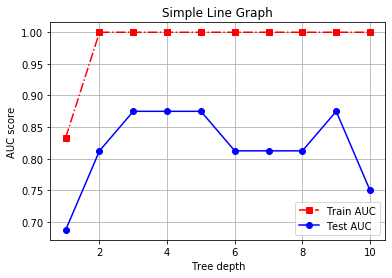

In [153]:
plt.plot(max_depths,train_res,label = 'Train AUC',color='r',marker='s',linestyle='-.')
plt.plot(max_depths,test_res,label = 'Test AUC',color='b',marker='o')

plt.legend() #use to display the label
plt.grid()
plt.title('Simple Line Graph')
plt.xlabel('Tree depth')
plt.ylabel('AUC score')
plt.show()

As we can see in above graph, model does overfitting for large value of tree depth. 
The tree predicts all the train data (red color line)....in which case it fails to generalize the finding for new data

# Lets fine tune (regularise) 'min_sample_leaf' paraeter

In [154]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [155]:
train_res = []
test_res = []
for min_samples_leaf in min_samples_leafs:
    reg_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    reg_model.fit(train_set, train_labels)
    
    train_predict = reg_model.predict(train_set)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_labels, train_predict)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_res.append(roc_auc)
    
    y_predict = reg_model.predict(test_set)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_predict)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_res.append(roc_auc)

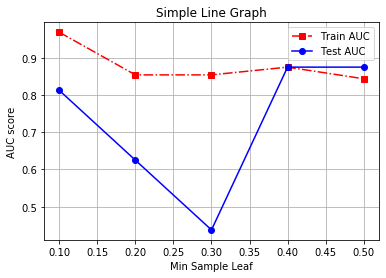

In [156]:
plt.plot(min_samples_leafs,train_res,label = 'Train AUC',color='r',marker='s',linestyle='-.')
plt.plot(min_samples_leafs,test_res,label = 'Test AUC',color='b',marker='o')

plt.legend() #use to display the label
plt.grid()
plt.title('Simple Line Graph')
plt.xlabel('Min Sample Leaf')
plt.ylabel('AUC score')
plt.show()

In [ ]:
As we can see increasing value of min sample leaf results in underfitting.

# How does regularization helps?

Regularisation for decison trees is done in order to
a) The regularization concept/method avoids selecting a new feature for splitting the data in a tree node when that  feature  produces  a  similar  gain  (e.g.  information gain) to features already selected, and thus produces a compact feature subset.
b) Due to above point(a) it limits maxium depth of decison tree
c) Also due to above point (a) it sets criteria on when to split node

# 8) Lets implement the decision tree using Random Forest and find the accuracy

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model_ran = RandomForestClassifier(n_estimators = 100)
model_ran.fit(train_set, train_labels)

RandomForestClassifier()

In [79]:
test_predict = model_ran.predict(test_set)

In [80]:
model_ran.score(test_set , test_labels)

0.8

In [82]:
print("Accuracy using Random Forect Method=" + str(accuracy_score(test_labels,test_predict)))

Accuracy using Random Forect Method=0.8


Lest create decision tree

In [84]:
from IPython.display import Image  
from sklearn import tree
from os import system

In [85]:
estimator = model_ran.estimators_[5]

In [86]:
train_char_label = ['0', '1']
tree.export_graphviz(estimator, out_file='/home/amol/GL/LabML/Residency3/Project2/tree.dot', 
                feature_names = list(train_set),
                class_names = list(train_char_label),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [87]:
from subprocess import call
call(['dot', '-Tpng', '/home/amol/GL/LabML/Residency3/Project2/tree.dot', '-o', '/home/amol/GL/LabML/Residency3/Project2/tree.png', '-Gdpi=600'])

0

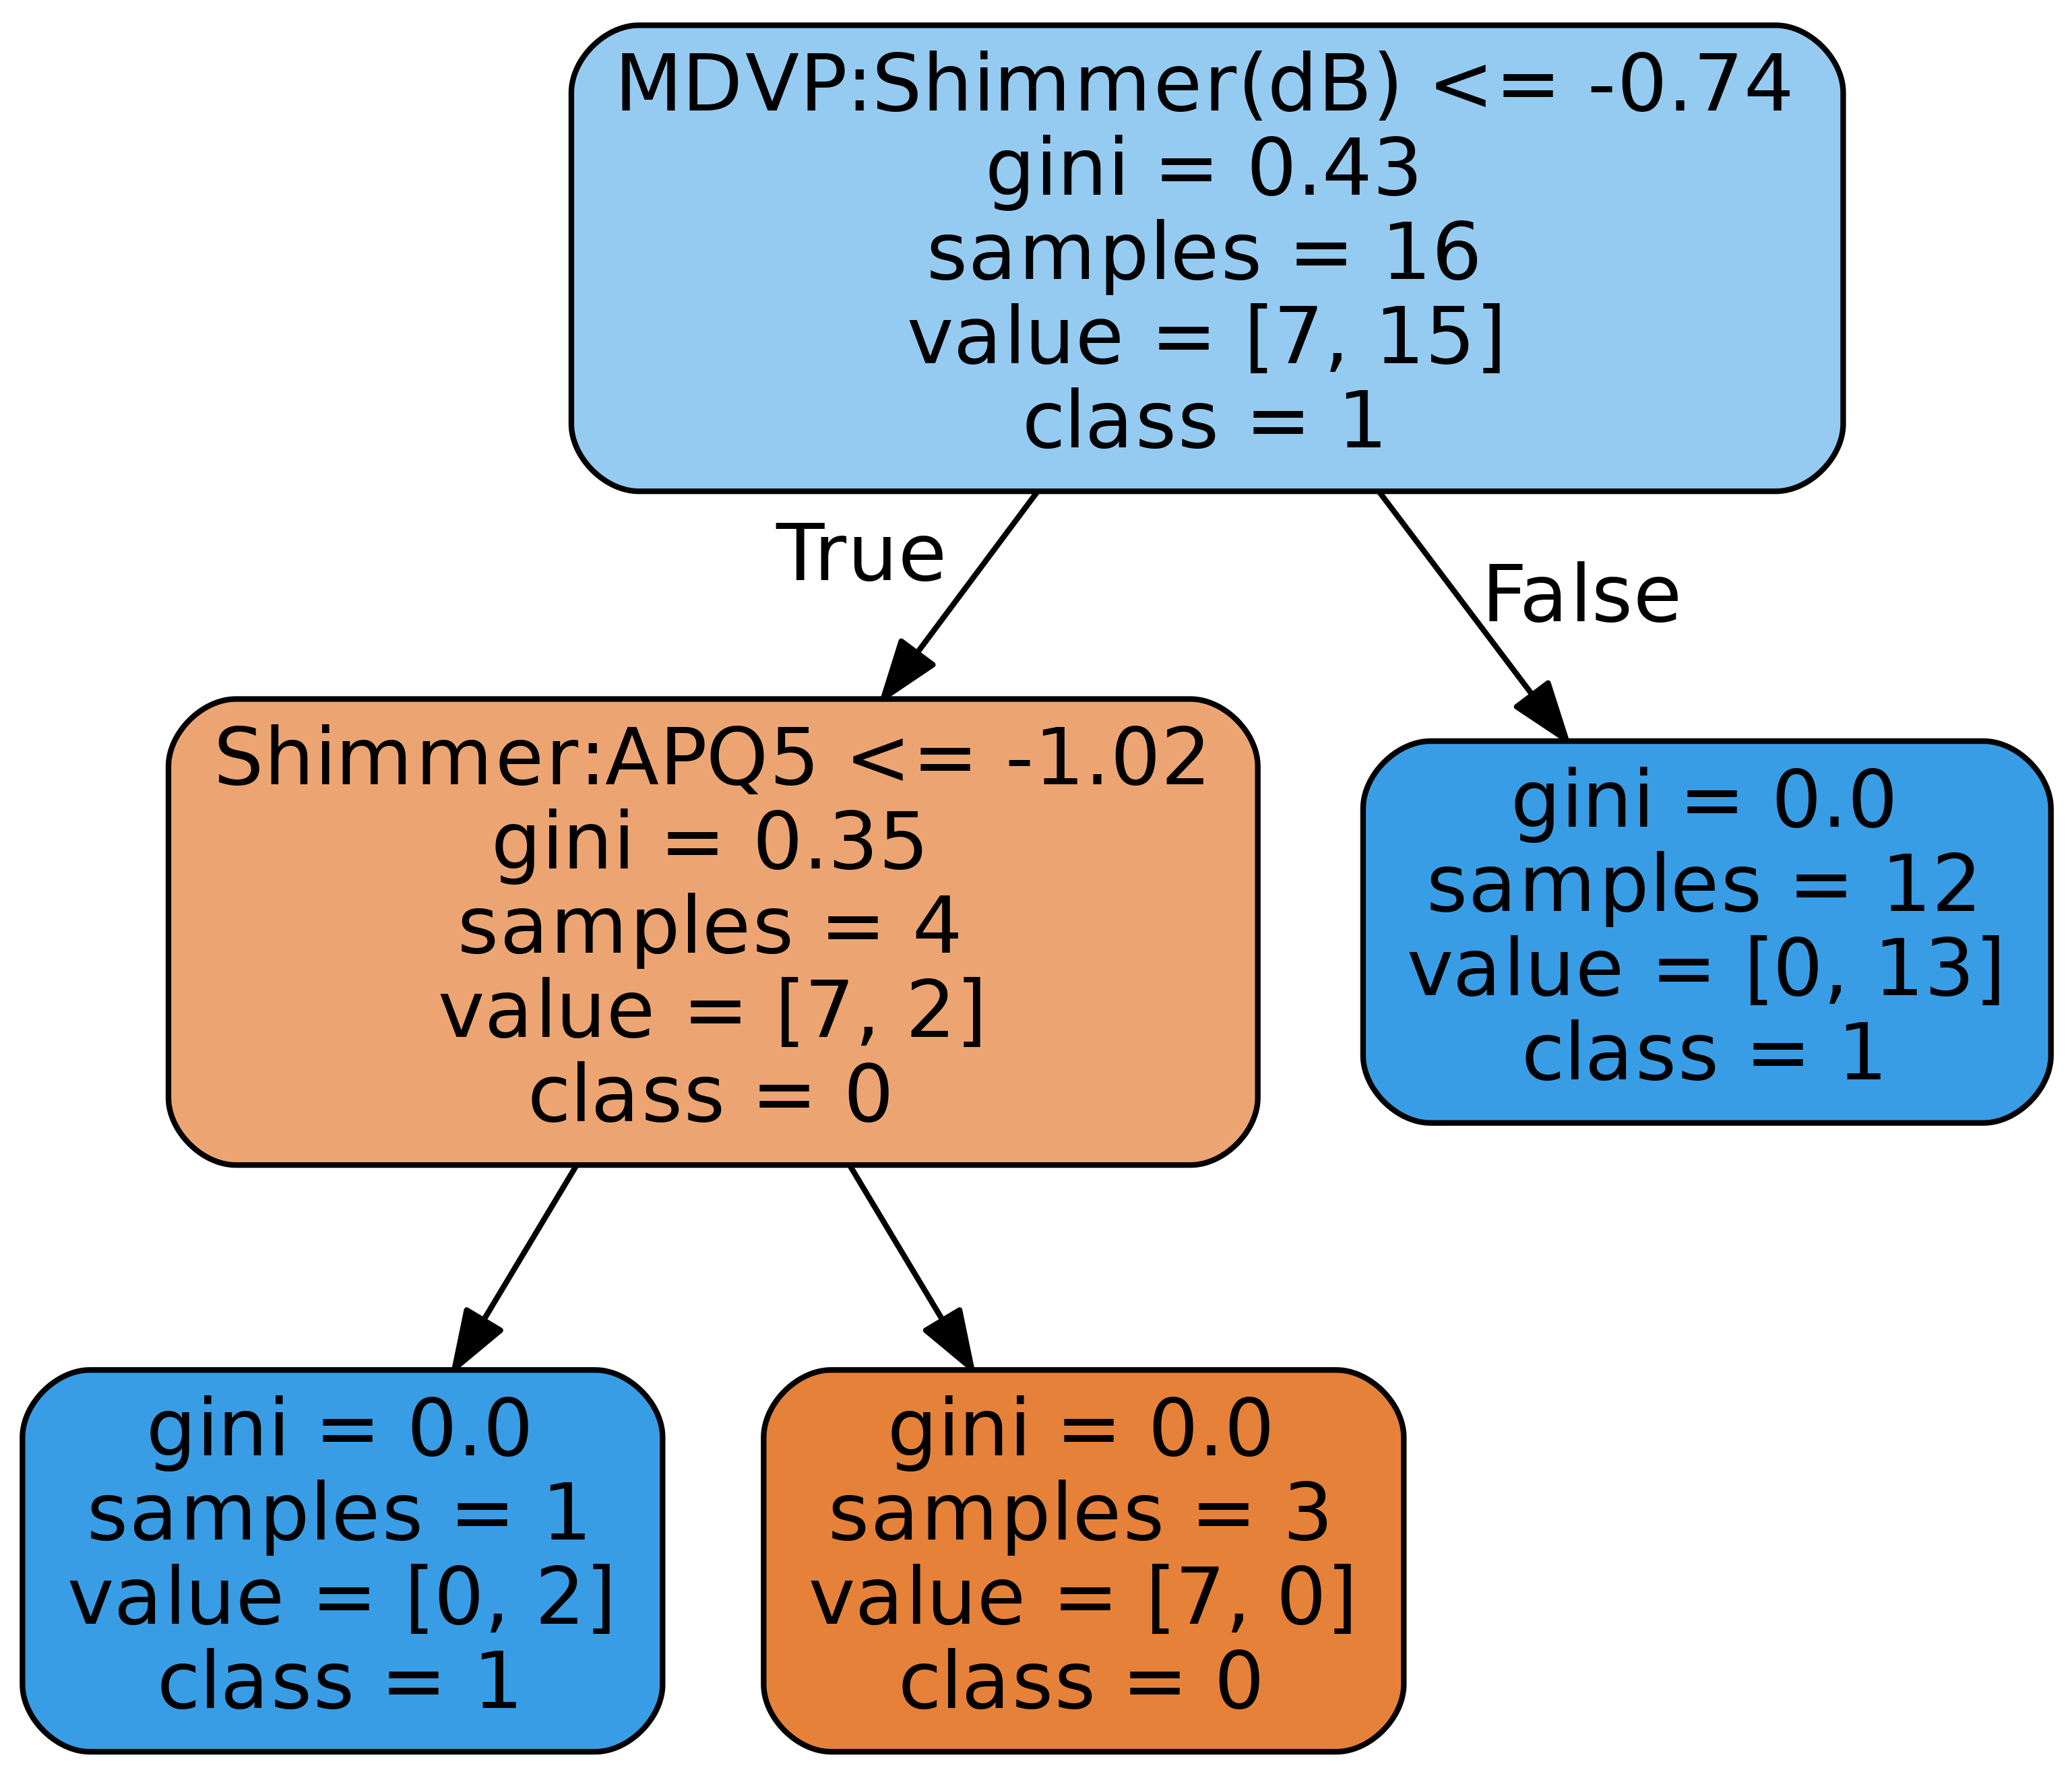

In [89]:
#Lets show the file
from IPython.display import Image
Image(filename = '/home/amol/GL/LabML/Residency3/Project2/tree.png')